Get the data here:
https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
        

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

%matplotlib inline

In [9]:
df = pd.read_csv('/Users/emmanuel/code/mre/ML-DL/covid19/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [12]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [14]:
~df.columns.isin(['Lat', 'Long'])

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [13]:
df.columns[~df.columns.isin(['Lat', 'Long'])]

Index(['Province/State', 'Country/Region', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20'],
      dtype='object')

In [15]:
df2 = df[df.columns[~df.columns.isin(['Lat', 'Long'])]]

In [16]:
df2 = df2.set_index(['Province/State','Country/Region'])

In [18]:
df2.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Province/State Country/Region                                                
NaN            Thailand              2        3        5        7        8   
               Japan                 2        1        2        2        4   
               Singapore             0        1        3        3        4   
               Nepal                 0        0        0        1        1   
               Malaysia              0        0        0        3        4   

                               1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  \
Province/State Country/Region                                                
NaN            Thailand              8       14       14       14       19   
               Japan                 4        7        7       11       15   
               Singapore             5        7        7       10       13   
               Nepal                 1        1        1        1        1   
               Malaysia              4        4        7        8        8   

                                ...     3/14/20  3/15/20  3/16/20  3/17/20  \
Province/State Country/Region   ...                                          
NaN            Thailand         ...          82      114      147      177   
               Japan            ...         773      839      825      878   
               Singapore        ...         212      226      243      266   
               Nepal            ...           1        1        1        1   
               Malaysia         ...         238      428      566      673   

                               3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  \
Province/State Country/Region                                                
NaN            Thailand            212      272      322      411      599   
               Japan               889      924      963     1007     1086   
               Singapore           313      345      385      432      455   
               Nepal                 1        1        1        1        2   
               Malaysia            790      900     1030     1183     1306   

                               3/23/20  
Province/State Country/Region           
NaN            Thailand          599.0  
               Japan            1086.0  
               Singapore         455.0  
               Nepal               2.0  
               Malaysia         1306.0  

[5 rows x 62 columns]

In [19]:
df2.stack()

Province/State  Country/Region         
NaN             Thailand        1/22/20     2.0
                                1/23/20     3.0
                                1/24/20     5.0
                                1/25/20     7.0
                                1/26/20     8.0
                                1/27/20     8.0
                                1/28/20    14.0
                                1/29/20    14.0
                                1/30/20    14.0
                                1/31/20    19.0
                                2/1/20     19.0
                                2/2/20     19.0
                                2/3/20     19.0
                                2/4/20     25.0
                                2/5/20     25.0
                                2/6/20     25.0
                                2/7/20     25.0
                                2/8/20     32.0
                                2/9/20     32.0
                                2/10/20    32.0


In [20]:
df3 = pd.DataFrame(df2.stack())

In [21]:
df3 = df3.reset_index()

In [23]:
df3.head()

,Province/State,Country/Region,level_2,0
0,NaN,Thailand,1/22/20,2.0
1,NaN,Thailand,1/23/20,3.0
2,NaN,Thailand,1/24/20,5.0
3,NaN,Thailand,1/25/20,7.0
4,NaN,Thailand,1/26/20,8.0


In [24]:
df3['level_2'] = pd.to_datetime(df3['level_2'])

In [25]:
df3 = df3.set_index('level_2')

In [26]:
df4 = df3[df3['Country/Region'] == 'US']

In [30]:
df4.head()

,Province/State,Country/Region,0
level_2,,,
2020-01-22,Washington,US,0.0
2020-01-23,Washington,US,0.0
2020-01-24,Washington,US,0.0
2020-01-25,Washington,US,0.0
2020-01-26,Washington,US,0.0


In [31]:
def province(r):
    if ',' in r['Province/State']:
        return r['Province/State'].split(",")[0].strip()
    else:
        return None
def state(r):
    return r['Province/State'].split(",")[-1].strip()
                           
df4['Province'] = df4.apply(province, axis=1)
df4['State'] = df4.apply(state, axis=1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [32]:
df4 = df4[['State', 'Province', 0]]

In [36]:
df4.head()

,State,Province,0
level_2,,,
2020-01-22,Washington,None,0.0
2020-01-23,Washington,None,0.0
2020-01-24,Washington,None,0.0
2020-01-25,Washington,None,0.0
2020-01-26,Washington,None,0.0


In [37]:
df4 = df4.reset_index().set_index(['level_2', 'Province', 'State'])

In [39]:
df4.tail()

,,,0
level_2,Province,State,
2020-03-19,NaN,US,0.0
2020-03-20,NaN,US,0.0
2020-03-21,NaN,US,0.0
2020-03-22,NaN,US,0.0
2020-03-23,NaN,US,1.0


In [43]:
df4.unstack().dropna(axis=1, how='all').unstack().dropna(axis=1, how='all')

0                                                    \
State                   AZ                   Alabama Alaska Arizona Arkansas   
Province   Maricopa County Pima Pinal County     NaN    NaN     NaN      NaN   
level_2                                                                        
2020-01-22             0.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-01-23             0.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-01-24             0.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-01-25             0.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-01-26             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-01-27             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-01-28             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-01-29             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-01-30             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-01-31             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-01             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-02             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-03             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-04             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-05             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-06             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-07             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-08             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-09             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-10             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-11             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-12             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-13             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-14             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-15             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-16             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-17             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-18             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-19             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-20             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
...                    ...  ...          ...     ...    ...     ...      ...   
2020-02-23             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-24             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-25             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-26             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-27             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-28             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-02-29             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-03-01             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-03-02             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-03-03             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-03-04             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-03-05             1.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-03-06             2.0  0.0          0.0     0.0    0.0     0.0      0.0   
2020-03-07             2.0  0.0          2.0     0.0    0.0     0.0      0.0   
2020-03-08             2.0  0.0          2.0     0.0    0.0     0.0      0.0   
2020-03-09             2.

In [44]:
df4 = df4.unstack().dropna(axis=1, how='all').unstack().dropna(axis=1, how='all')

In [45]:
df4 = df4[30:]

In [80]:
df4.columns.get_level_values(2)

Index([    'Maricopa County',                'Pima',        'Pinal County',
                         nan,                   nan,                   nan,
                         nan,      'Alameda County',           'Calaveras',
       'Contra Costa County',
       ...
                    'Skagit',    'Snohomish County',            'Thurston',
                   'Whatcom',                'Dane',              'Pierce',
                         nan,                   nan,                   nan,
                         nan],
      dtype='object', name='Province', length=249)

In [49]:
df5 = df4.iloc[:, df4.columns.get_level_values(0) == 'US']
df6 = df4.iloc[:, df4.columns.get_level_values(1) == 'California']

In [50]:
matplotlib.rcParams['figure.figsize'] = [18, 9]

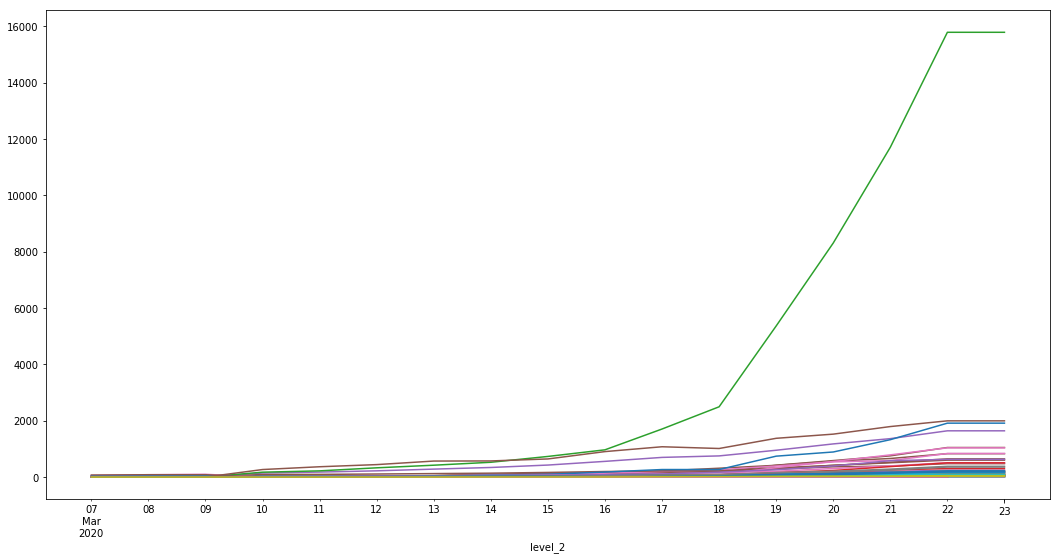

In [55]:
df4[15:].plot(legend=False)

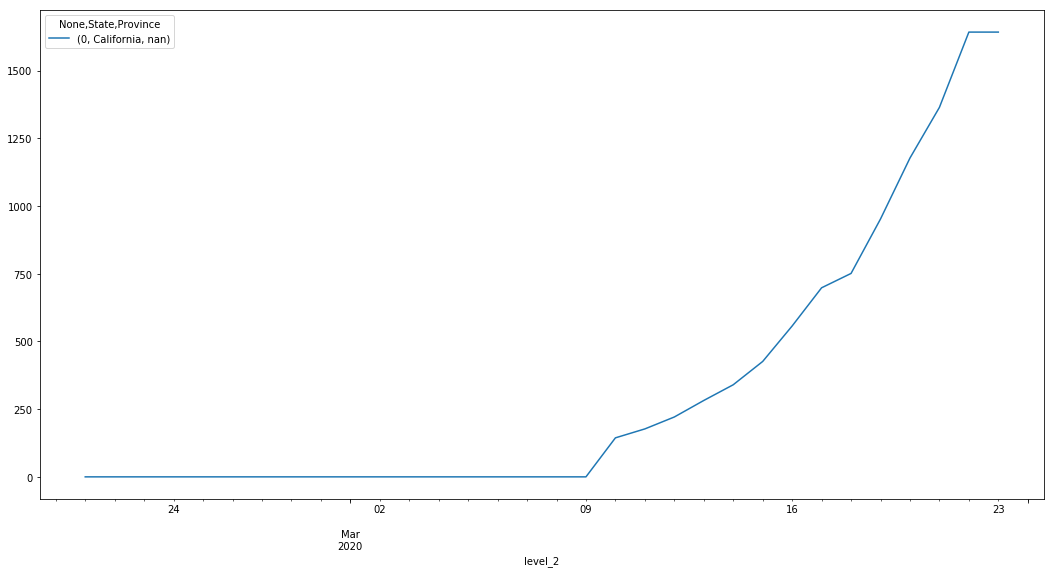

In [52]:
df6.plot()

In [56]:
df6.max()

   State       Province
0  California  NaN         1642.0
dtype: float64

In [57]:
df6.index.to_series().diff()

level_2
2020-02-21      NaT
2020-02-22   1 days
2020-02-23   1 days
2020-02-24   1 days
2020-02-25   1 days
2020-02-26   1 days
2020-02-27   1 days
2020-02-28   1 days
2020-02-29   1 days
2020-03-01   1 days
2020-03-02   1 days
2020-03-03   1 days
2020-03-04   1 days
2020-03-05   1 days
2020-03-06   1 days
2020-03-07   1 days
2020-03-08   1 days
2020-03-09   1 days
2020-03-10   1 days
2020-03-11   1 days
2020-03-12   1 days
2020-03-13   1 days
2020-03-14   1 days
2020-03-15   1 days
2020-03-16   1 days
2020-03-17   1 days
2020-03-18   1 days
2020-03-19   1 days
2020-03-20   1 days
2020-03-21   1 days
2020-03-22   1 days
2020-03-23   1 days
Name: level_2, dtype: timedelta64[ns]

In [59]:
df6.diff().diff()


,0
State,California
Province,NaN
level_2,
2020-02-21,NaN
2020-02-22,NaN
2020-02-23,0.0
2020-02-24,0.0
2020-02-25,0.0
2020-02-26,0.0
2020-02-27,0.0


In [60]:
g = df6.reset_index()
g['level_2'] = g['level_2'].apply(pd.Timestamp.timestamp)

In [61]:
g

,level_2,0
State,,California
Province,,NaN
0,1.582243e+09,0.0
1,1.582330e+09,0.0
2,1.582416e+09,0.0
3,1.582502e+09,0.0
4,1.582589e+09,0.0
5,1.582675e+09,0.0
6,1.582762e+09,0.0
7,1.582848e+09,0.0


In [62]:
np.gradient(g.values)

[array([[8.640e+04, 0.000e+00],
        [8.640e+04, 0.000e+00],
        [8.640e+04, 0.000e+00],
        [8.640e+04, 0.000e+00],
        [8.640e+04, 0.000e+00],
        [8.640e+04, 0.000e+00],
        [8.640e+04, 0.000e+00],
        [8.640e+04, 0.000e+00],
        [8.640e+04, 0.000e+00],
        [8.640e+04, 0.000e+00],
        [8.640e+04, 0.000e+00],
        [8.640e+04, 0.000e+00],
        [8.640e+04, 0.000e+00],
        [8.640e+04, 0.000e+00],
        [8.640e+04, 0.000e+00],
        [8.640e+04, 0.000e+00],
        [8.640e+04, 0.000e+00],
        [8.640e+04, 7.200e+01],
        [8.640e+04, 8.850e+01],
        [8.640e+04, 3.850e+01],
        [8.640e+04, 5.250e+01],
        [8.640e+04, 5.950e+01],
        [8.640e+04, 7.200e+01],
        [8.640e+04, 1.085e+02],
        [8.640e+04, 1.360e+02],
        [8.640e+04, 9.700e+01],
        [8.640e+04, 1.270e+02],
        [8.640e+04, 2.130e+02],
        [8.640e+04, 2.060e+02],
        [8.640e+04, 2.325e+02],
        [8.640e+04, 1.390e+02],
        

In [63]:
np.gradient(np.gradient(g.values))

[array([[[-1.58232960e+09, -1.58224320e+09],
         [-1.58241600e+09, -1.58232960e+09],
         [-1.58250240e+09, -1.58241600e+09],
         [-1.58258880e+09, -1.58250240e+09],
         [-1.58267520e+09, -1.58258880e+09],
         [-1.58276160e+09, -1.58267520e+09],
         [-1.58284800e+09, -1.58276160e+09],
         [-1.58293440e+09, -1.58284800e+09],
         [-1.58302080e+09, -1.58293440e+09],
         [-1.58310720e+09, -1.58302080e+09],
         [-1.58319360e+09, -1.58310720e+09],
         [-1.58328000e+09, -1.58319360e+09],
         [-1.58336640e+09, -1.58328000e+09],
         [-1.58345280e+09, -1.58336640e+09],
         [-1.58353920e+09, -1.58345280e+09],
         [-1.58362560e+09, -1.58353920e+09],
         [-1.58371200e+09, -1.58362560e+09],
         [-1.58379840e+09, -1.58371207e+09],
         [-1.58388466e+09, -1.58379834e+09],
         [-1.58397102e+09, -1.58388466e+09],
         [-1.58405738e+09, -1.58397103e+09],
         [-1.58414372e+09, -1.58405738e+09],
         [

In [64]:
df7 = df3[df3['Country/Region'] == 'US']

In [65]:
df8 = df7.groupby(level=0).sum()

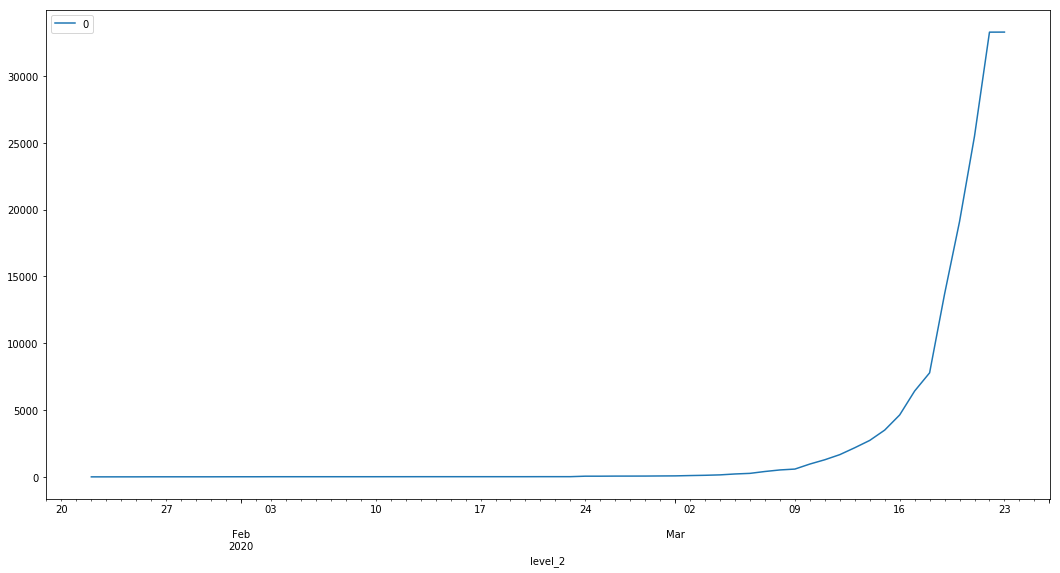

In [66]:
df8.plot()

In [67]:
g2 = df8.reset_index()
g2['level_2'] = g2['level_2'].apply(pd.Timestamp.timestamp)


In [68]:
df8.diff()

,0
level_2,
2020-01-22,NaN
2020-01-23,0.0
2020-01-24,1.0
2020-01-25,0.0
2020-01-26,3.0
2020-01-27,0.0
2020-01-28,0.0
2020-01-29,0.0
2020-01-30,0.0


In [83]:
df9 = df3[df3['Country/Region'] == 'US']
df9 = df9[['Province/State', 0]]


In [84]:
df9['Province'] = df9.apply(province, axis=1)
df9['State'] = df9.apply(state, axis=1)

In [86]:
df9 = df9.reset_index().set_index(['level_2', 'Province/State'])

In [87]:
df9 = df9.unstack()

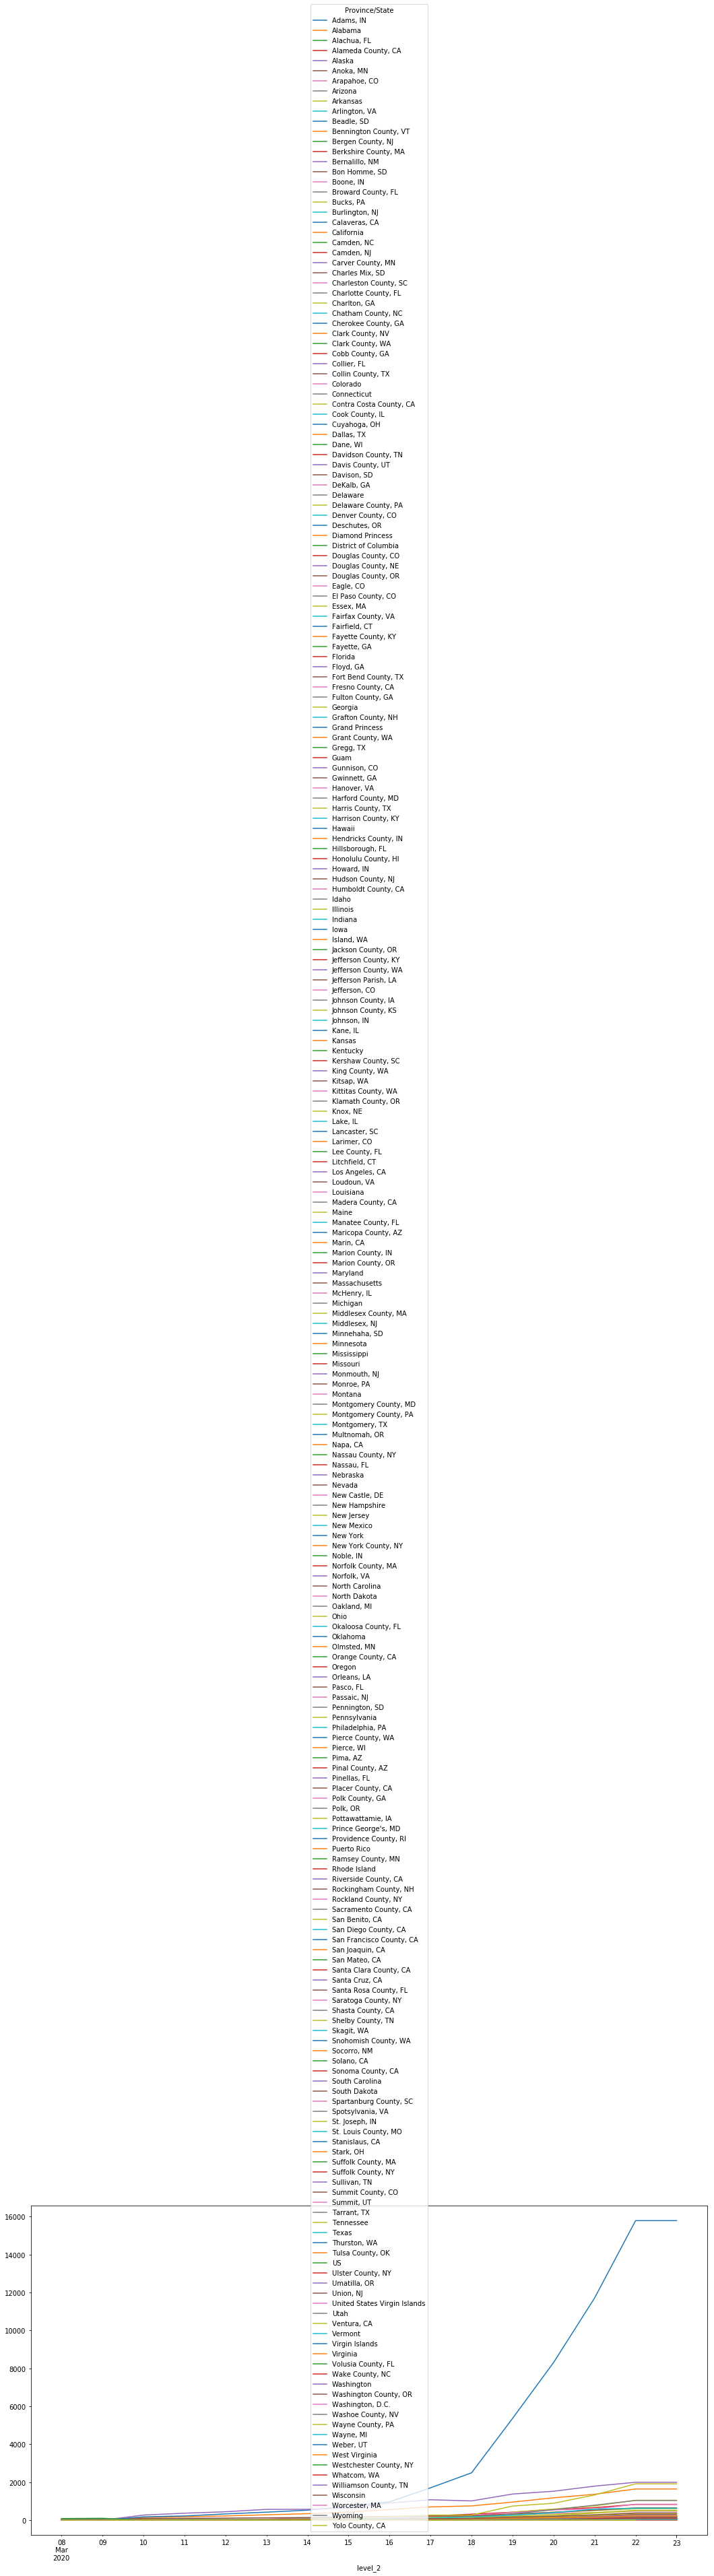

In [88]:
df9[0][46:].plot()